In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [258]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

## Data loader

In [259]:
p = Path('../data/UV_-VIS/')
p.ls()[:5]

[PosixPath('../data/UV_-VIS/coal char hummers.DSW'),
 PosixPath('../data/UV_-VIS/blank2.DSW'),
 PosixPath('../data/UV_-VIS/graphene oxide comercial de novo.DSW'),
 PosixPath('../data/UV_-VIS/graphite.DSW'),
 PosixPath('../data/UV_-VIS/blank3.DSW')]

In [260]:
parent=[x.parents[0] for x in p.rglob("*.[cC][sS][vV]")]
child=[x.name for x in p.glob("*.[cC][sS][vV]")]

In [261]:
parent

[PosixPath('../data/UV_-VIS'),
 PosixPath('../data/UV_-VIS'),
 PosixPath('../data/UV_-VIS')]

In [262]:
child

['graphene oxide.csv', 'graphene oxide comercial.csv', 'go commercial.csv']

In [265]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""  # fastai work-around LazyConfigValue problem
df = pd.read_csv(parent[0]/child[0],header=[0], delimiter = ',', skiprows=[1], skipfooter=1198, engine='python')
df.head()

,sample1,Unnamed: 1,sample2,Unnamed: 3,graphite,Unnamed: 5,graphite1,Unnamed: 7,graphite2,Unnamed: 9,...,Unnamed: 59,biochar oxidizer2,Unnamed: 61,biochar hummers,Unnamed: 63,biochar hummers1,Unnamed: 65,biochar hummers2,Unnamed: 67,Unnamed: 68
0,900.002258,0.000921,900.002258,0.000271,900.002258,0.070857,900.002258,0.070653,900.002258,0.212690,...,0.238437,900.002258,0.226418,900.002258,0.261922,900.002258,0.263384,900.002258,0.256945,NaN
1,899.012085,0.000839,899.012085,-0.000259,899.012085,0.069470,899.012085,0.071138,899.012085,0.210327,...,0.238321,899.012085,0.225899,899.012085,0.261404,899.012085,0.262717,899.012085,0.255998,NaN
2,897.988281,-0.000973,897.988281,-0.001088,897.988281,0.068515,897.988281,0.069160,897.988281,0.211716,...,0.236610,897.988281,0.224931,897.988281,0.260578,897.988281,0.262711,897.988281,0.255207,NaN
3,896.997009,0.000123,896.997009,-0.000431,896.997009,0.069685,896.997009,0.069748,896.997009,0.210139,...,0.237267,896.997009,0.224798,896.997009,0.262930,896.997009,0.262554,896.997009,0.257375,NaN
4,896.005310,-0.000069,896.005310,-0.000397,896.005310,0.069678,896.005310,0.070113,896.005310,0.211010,...,0.236150,896.005310,0.223617,896.005310,0.261547,896.005310,0.262230,896.005310,0.256695,NaN


In [266]:
# need to shift headers 1 to the right, care: wavelength columns NOT identical
cols = df.columns[:-2].insert(loc=0,item='Wavelength')

In [267]:
# df=df.drop('Unnamed: 68',1)  # dont uncomment and run this again else lose columns

In [269]:
df.columns=cols; df.head()  # dont uncomment and run this again else lose columns

,Wavelength,sample1,Unnamed: 1,sample2,Unnamed: 3,graphite,Unnamed: 5,graphite1,Unnamed: 7,graphite2,...,Unnamed: 57,biochar oxidizer1,Unnamed: 59,biochar oxidizer2,Unnamed: 61,biochar hummers,Unnamed: 63,biochar hummers1,Unnamed: 65,biochar hummers2
0,900.002258,0.000921,900.002258,0.000271,900.002258,0.070857,900.002258,0.070653,900.002258,0.212690,...,900.002258,0.238437,900.002258,0.226418,900.002258,0.261922,900.002258,0.263384,900.002258,0.256945
1,899.012085,0.000839,899.012085,-0.000259,899.012085,0.069470,899.012085,0.071138,899.012085,0.210327,...,899.012085,0.238321,899.012085,0.225899,899.012085,0.261404,899.012085,0.262717,899.012085,0.255998
2,897.988281,-0.000973,897.988281,-0.001088,897.988281,0.068515,897.988281,0.069160,897.988281,0.211716,...,897.988281,0.236610,897.988281,0.224931,897.988281,0.260578,897.988281,0.262711,897.988281,0.255207
3,896.997009,0.000123,896.997009,-0.000431,896.997009,0.069685,896.997009,0.069748,896.997009,0.210139,...,896.997009,0.237267,896.997009,0.224798,896.997009,0.262930,896.997009,0.262554,896.997009,0.257375
4,896.005310,-0.000069,896.005310,-0.000397,896.005310,0.069678,896.005310,0.070113,896.005310,0.211010,...,896.005310,0.236150,896.005310,0.223617,896.005310,0.261547,896.005310,0.262230,896.005310,0.256695


In [270]:
# df=df.drop(df.columns[2::2],1)  # dont uncomment and run this again else lose columns

In [384]:
df.head()

,Wavelength,sample1,sample2,graphite,graphite1,graphite2,coal oxidizer2,coal oxidizer3,coal hummers,coal hummers1,...,coal char oxidizer1,coal char oxidizer2,coal char hummers,coal char hummers1,biochar oxidizer,biochar oxidizer1,biochar oxidizer2,biochar hummers,biochar hummers1,biochar hummers2
0,900.002258,0.000921,0.000271,0.070857,0.070653,0.212690,0.205680,0.203511,0.040579,0.040770,...,0.078966,0.080881,0.084553,0.085165,0.242719,0.238437,0.226418,0.261922,0.263384,0.256945
1,899.012085,0.000839,-0.000259,0.069470,0.071138,0.210327,0.204517,0.203747,0.039325,0.039885,...,0.078531,0.081566,0.084202,0.086085,0.243946,0.238321,0.225899,0.261404,0.262717,0.255998
2,897.988281,-0.000973,-0.001088,0.068515,0.069160,0.211716,0.202601,0.202237,0.039294,0.038520,...,0.077134,0.080068,0.082412,0.084162,0.243217,0.236610,0.224931,0.260578,0.262711,0.255207
3,896.997009,0.000123,-0.000431,0.069685,0.069748,0.210139,0.204087,0.203255,0.039632,0.039844,...,0.077973,0.080707,0.083369,0.084932,0.243996,0.237267,0.224798,0.262930,0.262554,0.257375
4,896.005310,-0.000069,-0.000397,0.069678,0.070113,0.211010,0.203598,0.202788,0.039672,0.040469,...,0.077992,0.081262,0.083587,0.085148,0.242870,0.236150,0.223617,0.261547,0.262230,0.256695


## Data plots and normalize

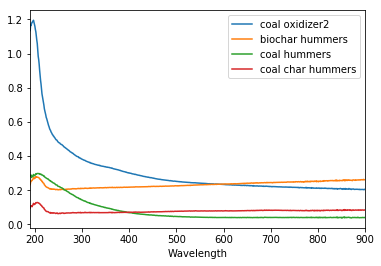

In [492]:
df.plot(x='Wavelength', y=['coal oxidizer2','biochar hummers', 'coal hummers', 'coal char hummers'])

In [493]:
def normalise(x, y): return (y-y.min())/(y.max()-y.min())

In [494]:
results = [normalise(x, val) for cols, val in df.iteritems()]

In [495]:
df2 = pd.DataFrame(results[1:]).T
df2.columns = [str(col) + '_norm' for col in df.columns[1:]]
df2.head()

,sample1_norm,sample2_norm,graphite_norm,graphite1_norm,graphite2_norm,coal oxidizer2_norm,coal oxidizer3_norm,coal hummers_norm,coal hummers1_norm,coal EL oxidizer_norm,...,coal char oxidizer1_norm,coal char oxidizer2_norm,coal char hummers_norm,coal char hummers1_norm,biochar oxidizer_norm,biochar oxidizer1_norm,biochar oxidizer2_norm,biochar hummers_norm,biochar hummers1_norm,biochar hummers2_norm
0,0.463477,0.594593,0.625160,0.281311,0.002540,0.003100,0.056841,0.011570,0.016110,0.007481,...,0.070595,0.070689,0.333314,0.405115,0.176565,0.169570,0.166045,0.766588,0.818839,0.811109
1,0.457712,0.567057,0.568709,0.281654,0.000188,0.001929,0.067371,0.006753,0.012643,0.007554,...,0.068981,0.073227,0.327931,0.418863,0.179584,0.169285,0.164766,0.759929,0.810113,0.798467
2,0.331203,0.524062,0.529801,0.280256,0.001570,0.000000,0.000000,0.006635,0.007291,0.007284,...,0.063793,0.067680,0.300489,0.390149,0.177789,0.165079,0.162385,0.749305,0.810036,0.787925
3,0.407751,0.558154,0.577447,0.280671,0.000000,0.001496,0.045424,0.007933,0.012480,0.004501,...,0.066908,0.070046,0.315165,0.401638,0.179707,0.166695,0.162055,0.779557,0.807990,0.816834
4,0.394327,0.559923,0.577161,0.280929,0.000867,0.001004,0.024575,0.008087,0.014933,0.006334,...,0.066978,0.072098,0.318501,0.404865,0.176936,0.163948,0.159149,0.761770,0.803746,0.807772


In [496]:
dfs=pd.concat([df,df2],axis=1)
dfs.head()

,Wavelength,sample1,sample2,graphite,graphite1,graphite2,coal oxidizer2,coal oxidizer3,coal hummers,coal hummers1,...,coal char oxidizer1_norm,coal char oxidizer2_norm,coal char hummers_norm,coal char hummers1_norm,biochar oxidizer_norm,biochar oxidizer1_norm,biochar oxidizer2_norm,biochar hummers_norm,biochar hummers1_norm,biochar hummers2_norm
0,900.002258,0.000921,0.000271,0.070857,0.070653,0.212690,0.205680,0.203511,0.040579,0.040770,...,0.070595,0.070689,0.333314,0.405115,0.176565,0.169570,0.166045,0.766588,0.818839,0.811109
1,899.012085,0.000839,-0.000259,0.069470,0.071138,0.210327,0.204517,0.203747,0.039325,0.039885,...,0.068981,0.073227,0.327931,0.418863,0.179584,0.169285,0.164766,0.759929,0.810113,0.798467
2,897.988281,-0.000973,-0.001088,0.068515,0.069160,0.211716,0.202601,0.202237,0.039294,0.038520,...,0.063793,0.067680,0.300489,0.390149,0.177789,0.165079,0.162385,0.749305,0.810036,0.787925
3,896.997009,0.000123,-0.000431,0.069685,0.069748,0.210139,0.204087,0.203255,0.039632,0.039844,...,0.066908,0.070046,0.315165,0.401638,0.179707,0.166695,0.162055,0.779557,0.807990,0.816834
4,896.005310,-0.000069,-0.000397,0.069678,0.070113,0.211010,0.203598,0.202788,0.039672,0.040469,...,0.066978,0.072098,0.318501,0.404865,0.176936,0.163948,0.159149,0.761770,0.803746,0.807772


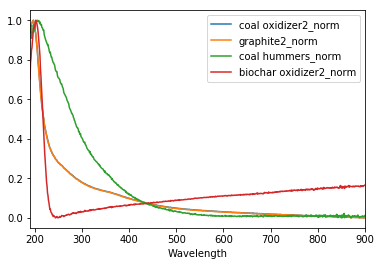

In [531]:
dfs.plot(x='Wavelength', y=['coal oxidizer2_norm','graphite2_norm', 'coal hummers_norm', 'biochar oxidizer2_norm'])

## Fitting

In [511]:
from lmfit.models import LinearModel, Model
from lmfit.lineshapes import *
from lmfit import Parameters, fit_report, minimize

In [677]:
pars = Parameters()

In [678]:
def line(x, slope, intercept):
    """a line"""
    return slope*x + intercept

def residual(pars, x, data=None, eps=None): #Function definition
    # unpack parameters, extract .value attribute for each parameter
    a1 = pars['a1'].value
    f1 = pars['f1'].value
    l1 = pars['l1'].value
    m = pars['m'].value
    c = pars['c'].value
    
    # Using the Gaussian model function from rampy
    peak1 = gaussian(x, a1, f1, l1)
#     peak3 = lorentzian(x,a3,f3,l3)
    line1 = line(x, m, c)
    
    model =  peak1 + line1 # The global model is the sum of the Gaussian peaks
    
    if data is None: # if we don't have data, the function only returns the direct calculation
        return model, peak1, line1
    if eps is None: # without errors, no ponderation
        return (model - data)
    return (model - data)/eps # with errors, the difference is ponderated

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 185
    # data points      = 711
    # variables        = 10
    chi-square         = 4.83903970
    reduced chi-square = 0.00690305
    Akaike info crit   = -3527.85881
    Bayesian info crit = -3482.19209
[[Variables]]
    sigma:      1.00000000 (init = 1)
    center:     0.00000000 (init = 0)
    amplitude:  1.00000000 (init = 1)
    slope:      0.00000000 (init = 0)
    intercept:  0.00000000 (init = 0)
    a1:         68.3207995 (init = 10)
    f1:         193.171202 (init = 200)
    l1:         29.9999975 (init = 20)
    m:          0.00000000 (init = 0)
    c:          0.00000000 (init = 0)


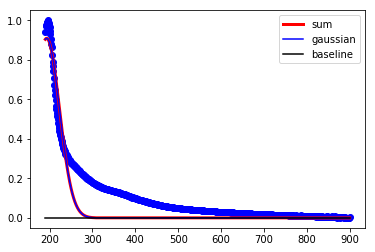

In [716]:
x = dfs['Wavelength'].values
y = dfs['coal oxidizer2_norm'].values

#            (Name,  Value,  Vary,   Min,  Max,  Expr)
pars.add_many(('a1',    10,   True,    0, None,  None),
             ('f1',    200,   False,  190,  205,  None),
             ('l1',     20,   True,    0,   30,  None),
             ('m',       0,   True,   0,  None,  None),
             ('c',       0,   True,   0,  None,  None))

result = minimize(residual, pars, method = 'leastsq', args=(x, y))

pars['f1'].vary = True
result2 = minimize(residual, pars, method = 'leastsq', args=(x, y))

yout, peak1,line1 = residual(result2.params,x)

print(fit_report(result2))

plt.plot(x, y, 'bo')
plt.plot(x, yout, 'r-', label='coal oxidizer2', linewidth=3)
plt.plot(x,peak1,'b-',label='gaussian')
plt.plot(x,line1,'k-',label='baseline')
plt.legend()
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 386
    # data points      = 711
    # variables        = 10
    chi-square         = 1.18590540
    reduced chi-square = 0.00169173
    Akaike info crit   = -4527.67395
    Bayesian info crit = -4482.00723
[[Variables]]
    sigma:      1.00000000 (init = 1)
    center:     0.00000000 (init = 0)
    amplitude:  1.00000000 (init = 1)
    slope:      0.00000000 (init = 0)
    intercept:  0.00000000 (init = 0)
    a1:         60.2677568 (init = 0.01)
    f1:         190.000001 (init = 200)
    l1:         29.5670655 (init = 20)
    m:         -1.5523e-04 (init = 0)
    c:          0.14000000 (init = 0)


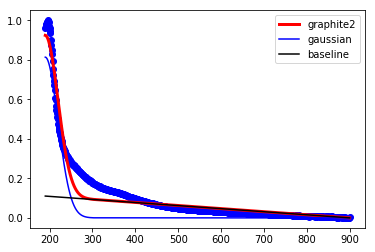

In [723]:
x = dfs['Wavelength'].values
y = dfs['graphite2_norm'].values

#            (Name,  Value,  Vary,   Min,  Max,  Expr)
pars.add_many(('a1',  0.01,   True,    0, None,  None),
             ('f1',    200,   False,  190,  210,  None),
             ('l1',     20,   True,    0,   30,  None),
             ('m',       0,   True, None,   None,  None),
             ('c',       0,   True,   None,  0.14,  None))

result = minimize(residual, pars, method = 'leastsq', args=(x, y))

pars['f1'].vary = True
result2 = minimize(residual, pars, method = 'leastsq', args=(x, y))
yout, peak1, line1 = residual(result2.params,x)

print(fit_report(result2))

plt.plot(x, y, 'bo')
plt.plot(x, yout, 'r-', label='graphite2', linewidth=3)
plt.plot(x,peak1,'b-',label='gaussian')
plt.plot(x,line1,'k-',label='baseline')
plt.legend()
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 204
    # data points      = 711
    # variables        = 10
    chi-square         = 16.5659957
    reduced chi-square = 0.02363195
    Akaike info crit   = -2652.87672
    Bayesian info crit = -2607.21000
[[Variables]]
    sigma:      1.00000000 (init = 1)
    center:     0.00000000 (init = 0)
    amplitude:  1.00000000 (init = 1)
    slope:      0.00000000 (init = 0)
    intercept:  0.00000000 (init = 0)
    a1:         75.0000000 (init = 0.01)
    f1:         209.999972 (init = 200)
    l1:         29.9999957 (init = 20)
    m:          0.00000000 (init = 0)
    c:          0.00000000 (init = 0)


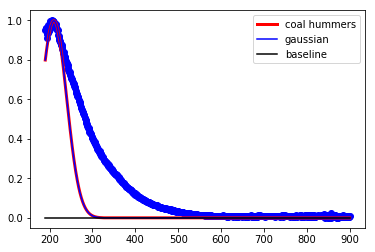

In [724]:
x = dfs['Wavelength'].values
y = dfs['coal hummers_norm'].values

#            (Name,  Value,  Vary,   Min,  Max,  Expr)
pars.add_many(('a1',  0.01,   True,    0, 75,  None),
             ('f1',    200,   False,  190,  210,  None),
             ('l1',     20,   True,    0,   30,  None),
             ('m',       0,   True, None,   0,  None),
             ('c',       0,   True,   None,  0.0,  None))

result = minimize(residual, pars, method = 'leastsq', args=(x, y))

pars['f1'].vary = True
result2 = minimize(residual, pars, method = 'leastsq', args=(x, y))
yout, peak1,line1 = residual(result2.params,x)

print(fit_report(result2))

plt.plot(x, y, 'bo')
# plt.plot(x, result.init_fit, 'k--')
plt.plot(x, yout, 'r-', label='coal hummers', linewidth=3)
plt.plot(x,peak1,'b-',label='gaussian')
plt.plot(x,line1,'k-',label='baseline')
plt.legend()
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 79
    # data points      = 711
    # variables        = 10
    chi-square         = 0.06493926
    reduced chi-square = 9.2638e-05
    Akaike info crit   = -6592.99344
    Bayesian info crit = -6547.32672
[[Variables]]
    sigma:      1.00000000 (init = 1)
    center:     0.00000000 (init = 0)
    amplitude:  1.00000000 (init = 1)
    slope:      0.00000000 (init = 0)
    intercept:  0.00000000 (init = 0)
    a1:         32.4874690 (init = 0.01)
    f1:         201.526774 (init = 200)
    l1:         12.8383953 (init = 20)
    m:          2.3080e-04 (init = 0)
    c:         -0.03371988 (init = 0)


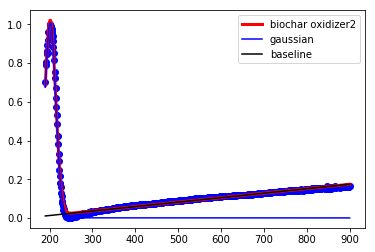

In [725]:
x = dfs['Wavelength'].values
y = dfs['biochar oxidizer2_norm'].values

#            (Name,  Value,  Vary,   Min,  Max,  Expr)
pars.add_many(('a1',  0.01,   True,    0, None,  None),
             ('f1',    200,   False,  190,  210,  None),
             ('l1',     20,   True,    0,   50,  None),
             ('m',       0,   True, None,   None,  None),
             ('c',       0,   True,   None,  None,  None))

result = minimize(residual, pars, method = 'leastsq', args=(x, y))

pars['f1'].vary = True
result2 = minimize(residual, pars, method = 'leastsq', args=(x, y))
yout, peak1,line1 = residual(result2.params,x)

print(fit_report(result2))

plt.plot(x, y, 'bo')
# plt.plot(x, result.init_fit, 'k--')
plt.plot(x, yout, 'r-', label='biochar oxidizer2', linewidth=3)
plt.plot(x,peak1,'b-',label='gaussian')
plt.plot(x,line1,'k-',label='baseline')
plt.legend()
plt.show()

In [424]:
x = df['Wavelength'].values
y = df.iloc[:,20].values

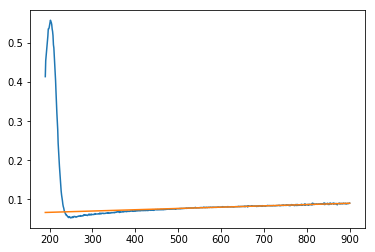

In [425]:
plt.plot(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x[:-300], y[:-300], 1))(np.unique(x)))

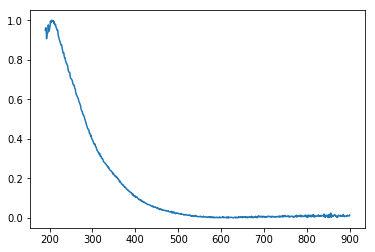

In [393]:
x_fit = x
y_fit = y+np.poly1d(np.polyfit(x[:-300], y[:-300], 1))(np.unique(x))  # linear baseline subtraction
y_mm = (y_fit-y_fit.min())/(y_fit.max()-y_fit.min())  # normalize peak to 1
plt.plot(x_fit,y_mm)

In [298]:
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


def line(x, slope, intercept):
    """a line"""
    return slope*x + intercept

[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 711
    # variables        = 5
    chi-square         = 5.8847e-04
    reduced chi-square = 8.3352e-07
    Akaike info crit   = -9947.31350
    Bayesian info crit = -9924.48014
[[Variables]]
    amp:        0.78577039 +/- 0.04780070 (6.08%) (init = 0.01)
    cen:        191.519831 +/- 1.19131443 (0.62%) (init = 200)
    wid:        17.2955870 +/- 0.79596649 (4.60%) (init = 1)
    slope:      2.0143e-05 +/- 1.8637e-07 (0.93%) (init = 0)
    intercept:  0.05241024 +/- 1.1207e-04 (0.21%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen)         = -0.956
    C(amp, wid)         =  0.954
    C(slope, intercept) = -0.948
    C(cen, wid)         = -0.915
    C(amp, intercept)   = -0.262
    C(amp, slope)       =  0.234
    C(wid, intercept)   = -0.231
    C(wid, slope)       =  0.205
    C(cen, intercept)   =  0.

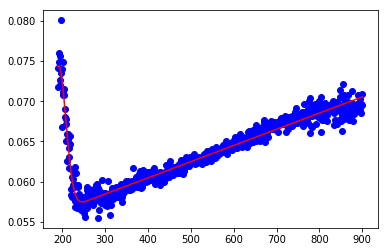

In [299]:
x = df['Wavelength'].values
y = df['graphite'].values

mod = Model(gaussian) + Model(line)
pars = mod.make_params(amp=0.01, cen=200, wid=1, slope=0, intercept=1)

result = mod.fit(y, pars, x=x)

print(result.fit_report())

plt.plot(x, y, 'bo')
# plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 711
    # variables        = 5
    chi-square         = 0.00100818
    reduced chi-square = 1.4280e-06
    Akaike info crit   = -9564.52851
    Bayesian info crit = -9541.69515
[[Variables]]
    amp:        2.35966667 +/- 0.01423831 (0.60%) (init = 0.01)
    cen:        203.412177 +/- 0.07393157 (0.04%) (init = 200)
    wid:        12.2746279 +/- 0.08437883 (0.69%) (init = 1)
    slope:      8.6993e-05 +/- 2.4147e-07 (0.28%) (init = 0)
    intercept:  0.18319527 +/- 1.4478e-04 (0.08%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.947
    C(amp, wid)         =  0.775
    C(amp, intercept)   = -0.429
    C(cen, wid)         = -0.420
    C(amp, slope)       =  0.383
    C(amp, cen)         = -0.368
    C(wid, intercept)   = -0.227
    C(wid, slope)       =  0.202



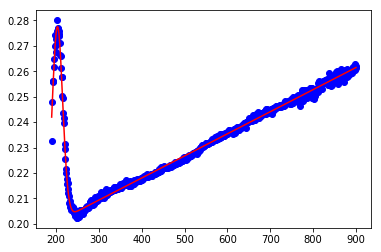

In [300]:
x = df['Wavelength'].values
y = df['biochar hummers'].values

mod = Model(gaussian) + Model(line)
pars = mod.make_params(amp=0.01, cen=200, wid=1, slope=0, intercept=1)

result = mod.fit(y, pars, x=x)

print(result.fit_report())

plt.plot(x, y, 'bo')
# plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 711
    # variables        = 5
    chi-square         = 0.01122398
    reduced chi-square = 1.5898e-05
    Akaike info crit   = -7851.08269
    Bayesian info crit = -7828.24933
[[Variables]]
    amp:        83.2305865 +/- 2.44828057 (2.94%) (init = 0.01)
    cen:        135.047959 +/- 3.29524292 (2.44%) (init = 200)
    wid:        114.202987 +/- 1.62715070 (1.42%) (init = 1)
    slope:     -1.5299e-05 +/- 1.6022e-06 (10.47%) (init = 0)
    intercept:  0.05162968 +/- 0.00112327 (2.18%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen)         = -0.989
    C(slope, intercept) = -0.985
    C(amp, wid)         =  0.983
    C(cen, wid)         = -0.969
    C(wid, intercept)   = -0.615
    C(amp, intercept)   = -0.593
    C(wid, slope)       =  0.574
    C(amp, slope)       =  0.556
    C(cen, intercept)   =  

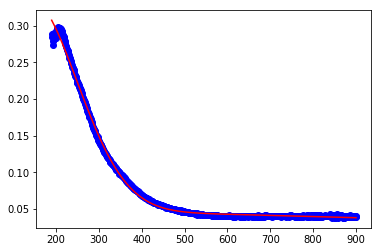

In [301]:
x = df['Wavelength'].values
y = df['coal hummers'].values

mod = Model(gaussian) + Model(line)
pars = mod.make_params(amp=0.01, cen=200, wid=1, slope=0, intercept=1)

result = mod.fit(y, pars, x=x)

print(result.fit_report())

plt.plot(x, y, 'bo')
# plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 78
    # data points      = 711
    # variables        = 5
    chi-square         = 0.00244856
    reduced chi-square = 3.4682e-06
    Akaike info crit   = -8933.61737
    Bayesian info crit = -8910.78401
[[Variables]]
    amp:        1.77922618 +/- 0.02023633 (1.14%) (init = 0.01)
    cen:        203.832969 +/- 0.13052469 (0.06%) (init = 200)
    wid:        11.5417568 +/- 0.14995953 (1.30%) (init = 1)
    slope:      2.8717e-05 +/- 3.7499e-07 (1.31%) (init = 0)
    intercept:  0.06001183 +/- 2.2462e-04 (0.37%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.947
    C(amp, wid)         =  0.748
    C(amp, intercept)   = -0.434
    C(amp, slope)       =  0.387
    C(cen, wid)         = -0.346
    C(amp, cen)         = -0.290
    C(wid, intercept)   = -0.227
    C(wid, slope)       =  0.201



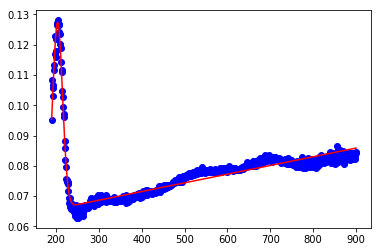

In [302]:
x = df['Wavelength'].values
y = df['coal char hummers'].values

mod = Model(gaussian) + Model(line)
pars = mod.make_params(amp=0.01, cen=200, wid=1, slope=0, intercept=1)

result = mod.fit(y, pars, x=x)

print(result.fit_report())

plt.plot(x, y, 'bo')
# plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [195]:
def normalise(x, y):
    bir = np.array([(1000,1100),(1750,1800)]) # The regions where the baseline will be fitted

    y_corr, y_base = rp.baseline(x, y, bir,'poly',polynomial_order=2)
    
    # signal selection
    lb = 1100  # The lower boundary of interest
    hb = 1800  # The upper boundary

    x_fit = x[np.where((x > lb)&(x < hb))]
    y_fit = y_corr[np.where((x > lb)&(x < hb))]
    
    #SVN normalisation
    y_hat = y_fit.mean()
    std = sqrt(np.sum((y_fit-y_hat)**2)/(len(y_fit)-1))
    y_sn = (y_fit-y_hat)/std
    
    #min-max normalisation
    y_sn_hat = y_sn.mean()
    y_mm = (y_sn-y_sn.min())/(y_sn.max()-y_sn.min())
    
    return y_mm

In [154]:
x = df_['Wavelength'].values

In [341]:
# results=[normalise(x, val.values) for cols,val in df.iteritems()]
for cols, val in df.iteritems():
    results.append(normalise(x, val.values))

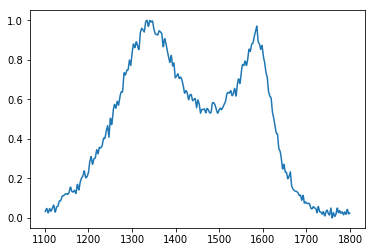

In [353]:
plot(x_fit,results[1])